# Cointegration

# Intuition

Read [Drunk woman walking with her dog](http://faculty.wwu.edu/kriegj/Econ470/A%20drunk%20and%20her%20dog.pdf) [PDF].

Simplified:
- Two time series X and Y
- Perform linear regression to find $\alpha$ and $\beta$ in equation $Y = \alpha \ X + \beta$
- Calculate $residue = Y - \alpha \ X$
- If residue is stationary, then X and Y are cointegrated

Read [Integration, Cointegration, and Stationarity](https://github.com/Auquan/Tutorials/blob/master/Integration%2C%20Cointegration%2C%20and%20Stationarity.ipynb).

# Let's Try

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import coint, adfuller
N = 200

In [61]:
def plotCoint(l1, y1, l2, y2, figsize=(15, 6), style='bmh', twinx=False):
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)

        layout = (3, 2)
        ax1 = plt.subplot2grid(layout, (0, 0), colspan=2, rowspan=2)
        rax = plt.subplot2grid(layout, (2, 0), colspan=2)

        t, pval, _ = coint(y1, y2)
        rel = 'cointegrated' if pval < 0.05 else 'NOT cointegrated'
        ax1.set_title('%s and %s are %s (pval: %.4f)' % (l1, l2, rel, pval))
        ax1.plot(y1, label=l1, color='C0')

        ax2 = ax1.twinx() if twinx else ax1
        ax2.plot(y2, label=l2, color='C1')
        
        ax1.legend(loc=2)
        ax1.grid(True)
        
        if twinx:
            ax1.set_ylabel(l1)
            ax2.set_ylabel(l2)
            ax2.grid(False)
            ax2.legend(loc=1)
            ax1.tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
        
        coefs = np.polyfit(y1, y2, 1)
        residue = y2 - coefs[0] * y1 - coefs[1]
        rax.plot(residue, label='Residue', color='C2', zorder=10)
        rax.axhline(residue.mean(), label='Mean', linestyle='--', color='C1', zorder=0)
        
        pval = adfuller(residue)[1]
        rax.set_title('Residue is %sstationary (pval: %.4f)' % ('NOT ' if pval >= 0.05 else '', pval))
        rax.legend()

        plt.tight_layout()

# White Noises

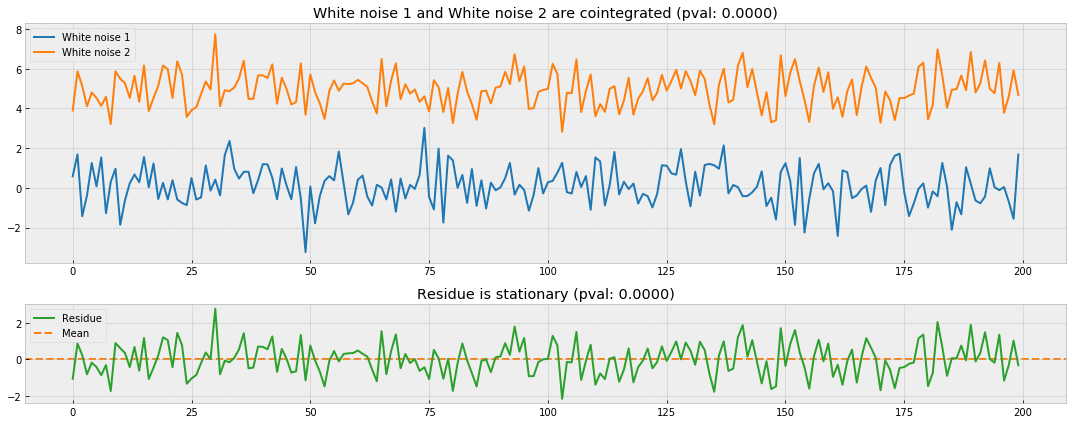

In [65]:
y1 = np.random.normal(scale=1, size=N)
y2 = 5 + np.random.normal(scale=1, size=N)

plotCoint('White noise 1', y1, 'White noise 2', y2)

Two white noises are cointegrated, as expected, because they are just oscilating around their mean, thus the difference will be white noise.

# Lines

Simple lines (with a little white noise to make cointegration calculation stable).

In [59]:
def generateLine(n=N, slope=1):
    if slope:
        w = np.random.normal(scale=slope/10, size=n)
        return np.arange(0, n*slope, slope) + w
    else:
        w = np.random.normal(scale=0.1, size=n)
        return w

### Horizontal Lines

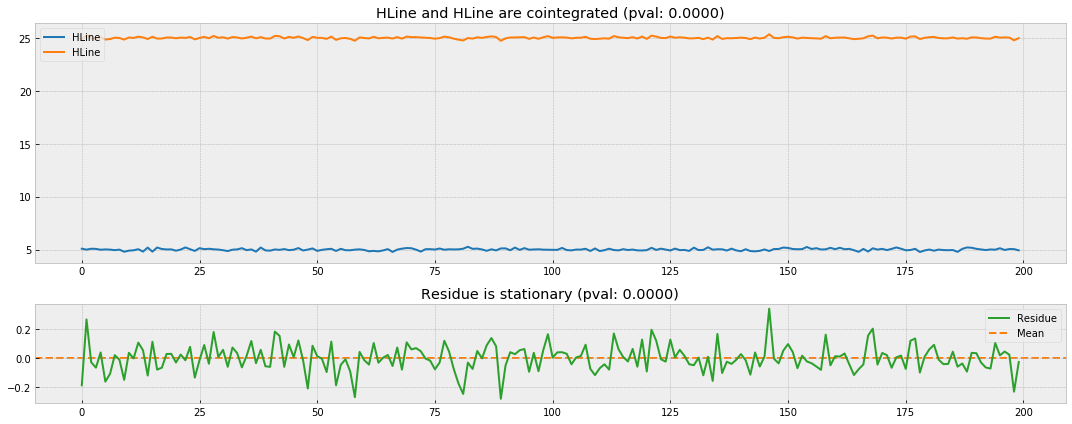

In [62]:
y1 = 5 + generateLine(slope=0)
y2 = 25 + generateLine(slope=0)

plotCoint('HLine', y1, 'HLine', y2)

Similar to white noise, two horizontal lines are cointegrated as expected because their residue is then just white noise (=stationary).

### Linearly Diverged Lines

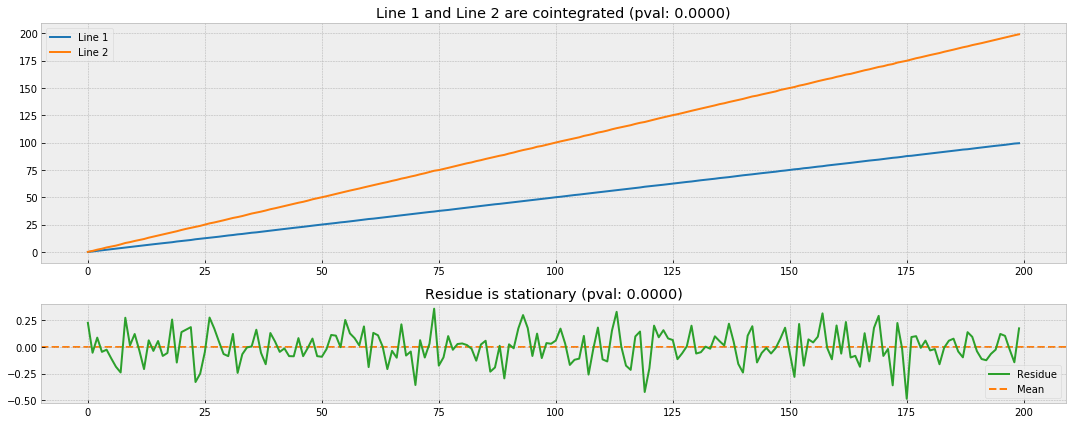

In [63]:
y1 = generateLine(slope=0.5)
y2 = generateLine(slope=1)

plotCoint('Line 1', y1, 'Line 2', y2)

Unintuitively, two diverged lines are cointegrated! But this makes sense because the scaling between two lines is linear and thus the residue will be stationary.

### Flipped Lines

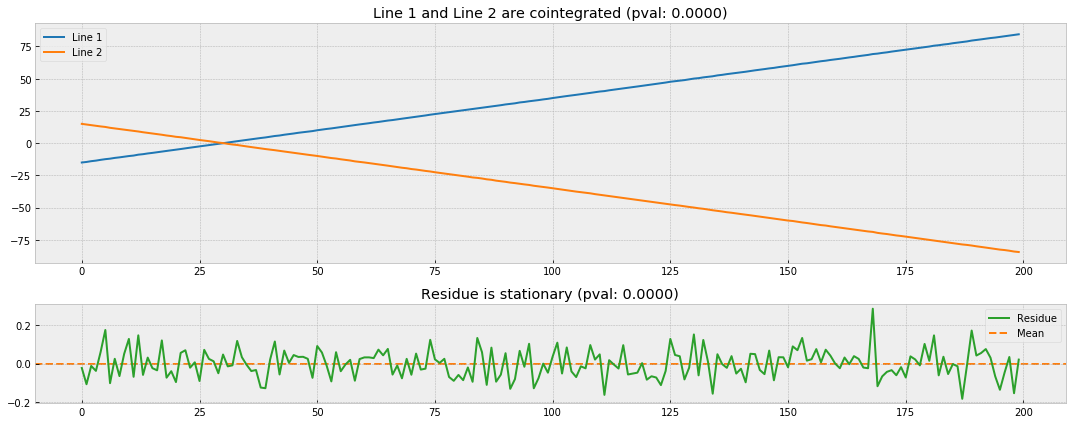

In [76]:
y1 = -15 + generateLine(slope=0.5)
y2 = 15 - generateLine(slope=0.5)

plotCoint('Line 1', y1, 'Line 2', y2)

Even more unintuitively, flipped/oppositing lines are cointegrated! This can be understood because their relationship is still linear, although the linear slope is negative!

### Exponentially Diverged Lines

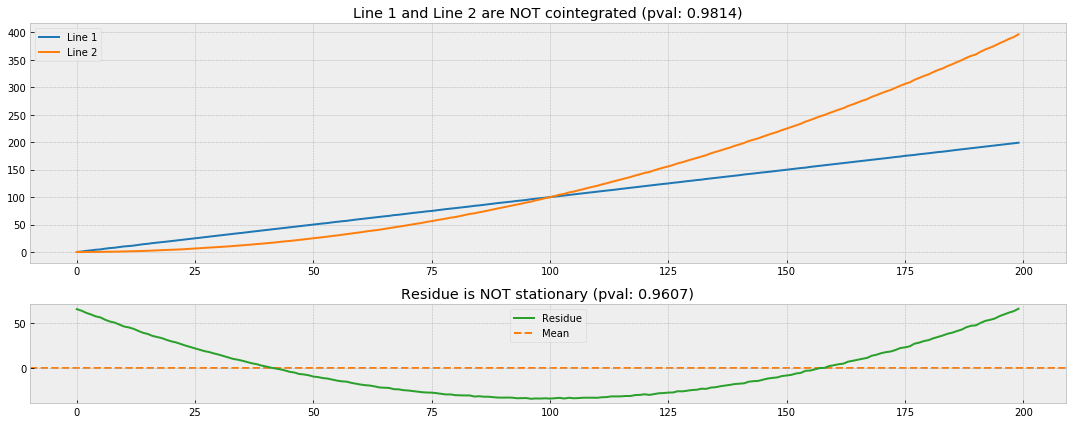

In [68]:
y1 = generateLine(slope=1)
y2 = generateLine(slope=0.1)
y2 = y2 * y2

plotCoint('Line 1', y1, 'Line 2', y2)

As expected, exponentially diverged lines are not cointegrated because their relationship is no longer linear.

# Sine Waves

Sine waves with a little bit of white noise.

In [43]:
def generateSine(n=N, numPeriods=1, startPeriod=0):
    period = n / numPeriods
    x = np.arange(startPeriod, startPeriod+2*np.pi*numPeriods, 2*np.pi/period)
    return np.sin(x) + np.random.normal(scale=0.01, size=n)

### Linearly Scaled Sine Waves

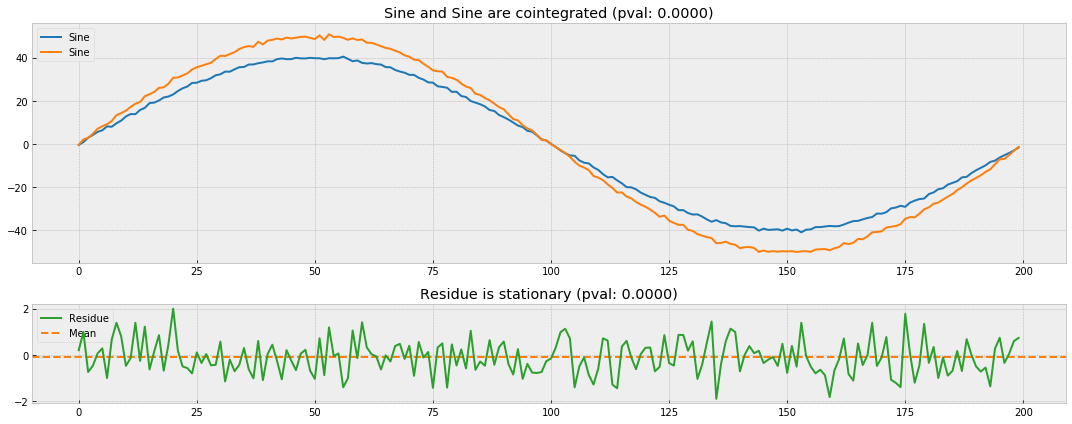

In [47]:
y1 = 40 * generateSine()
y2 = 50 * generateSine()

plotCoint('Sine', y1, 'Sine', y2)

They are cointegrated as expected.

### Linearly Diverge Sine Waves

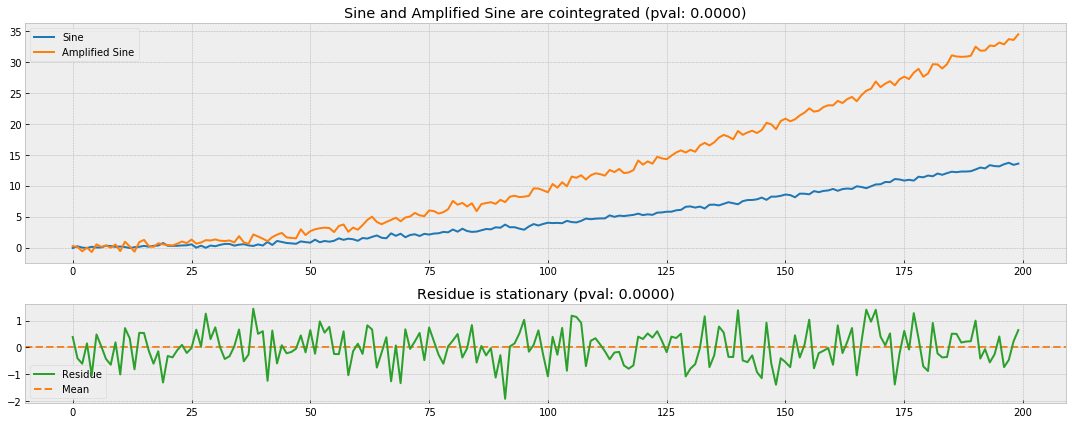

In [81]:
y1 = 20 + 20 * generateSine(numPeriods=0.2, startPeriod=-np.pi/2)
y2 = 50 + 50 * generateSine(numPeriods=0.2, startPeriod=-np.pi/2)

plotCoint('Sine', y1, 'Amplified Sine', y2)

Although the chart is unintuitive, they are cointegrated because the relationship is linear.

### Exponentially Scaled Sine Waves

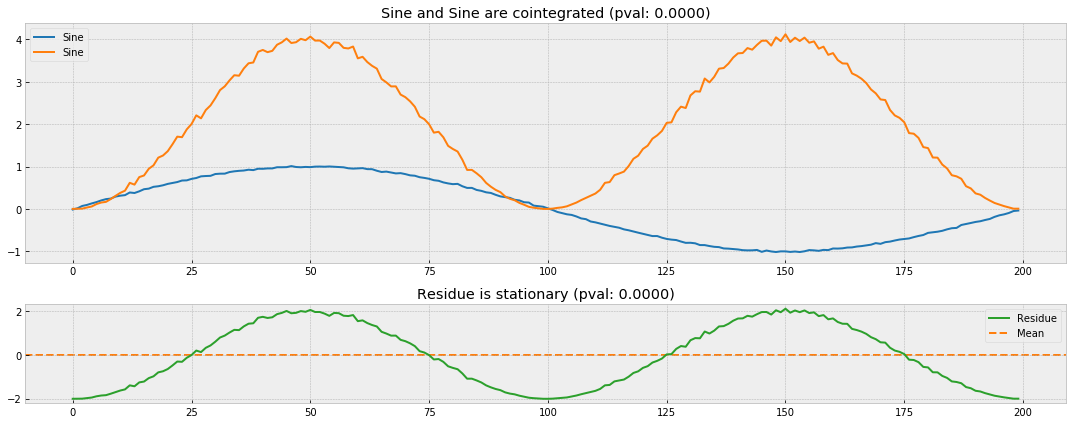

In [77]:
y1 = generateSine()
y2 = 2 * generateSine()
y2 = y2 * y2

plotCoint('Sine', y1, 'Sine', y2)

Unexpectedly, they are cointegrated!

### Lagged 10

y2 is lagged by 10 time steps.

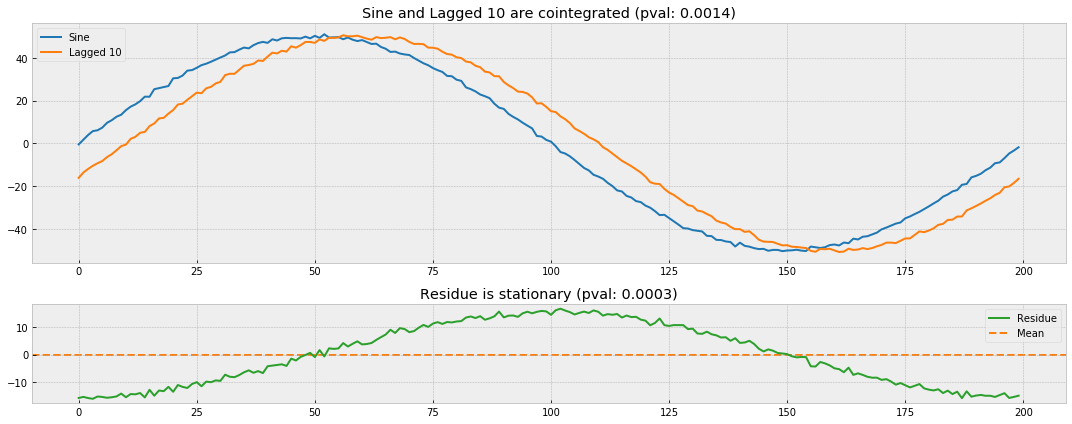

In [78]:
lag = 10
y1 = 50 * generateSine()
y2 = 50 * generateSine(startPeriod=-2*np.pi*lag/N)

plotCoint('Sine', y1, 'Lagged %d' % lag, y2)

### Lagged 25

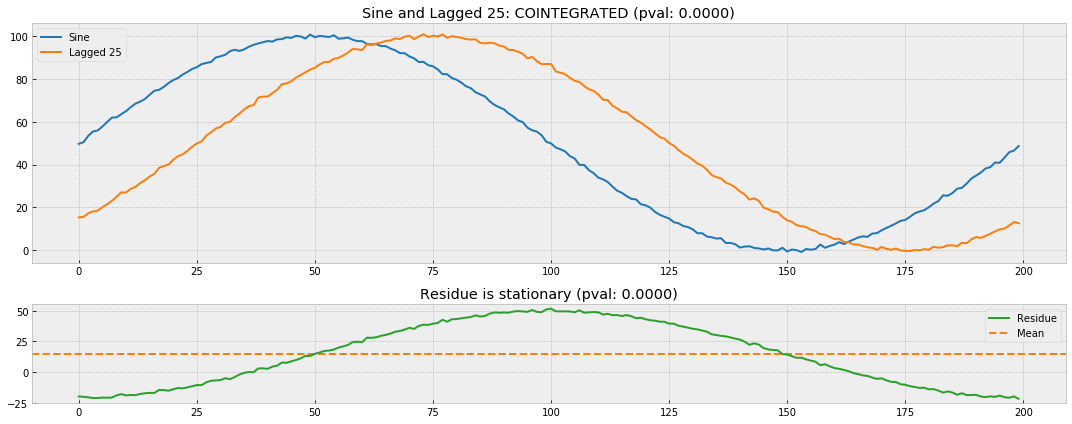

In [29]:
lag = 25
y1 = 50 + 50 * generateSine()
y2 = 50 + 50 * generateSine(startPeriod=-2*np.pi*lag/N)

plotCoint('Sine', y1, 'Lagged %d' % lag, y2)

### Lagged 50

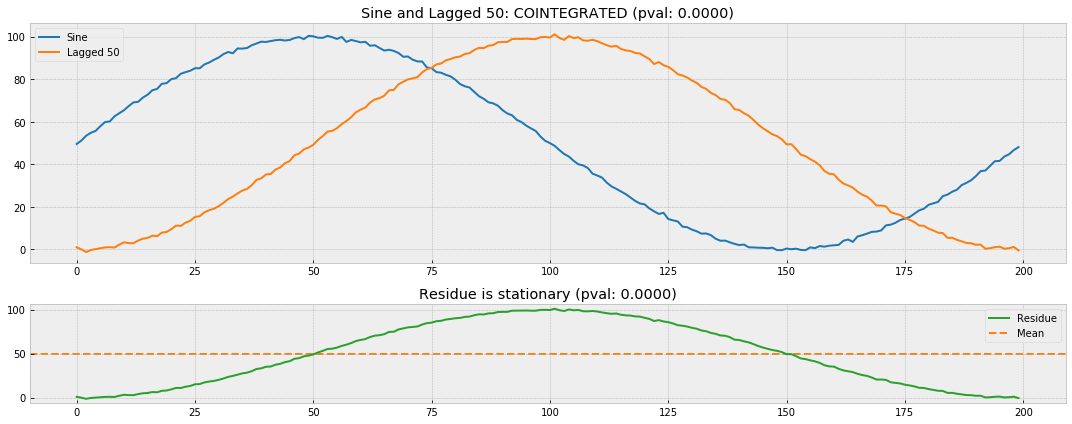

In [30]:
lag = 50
y1 = 50 + 50 * generateSine()
y2 = 50 + 50 * generateSine(startPeriod=-2*np.pi*lag/N)

plotCoint('Sine', y1, 'Lagged %d' % lag, y2)

### Lagged 100

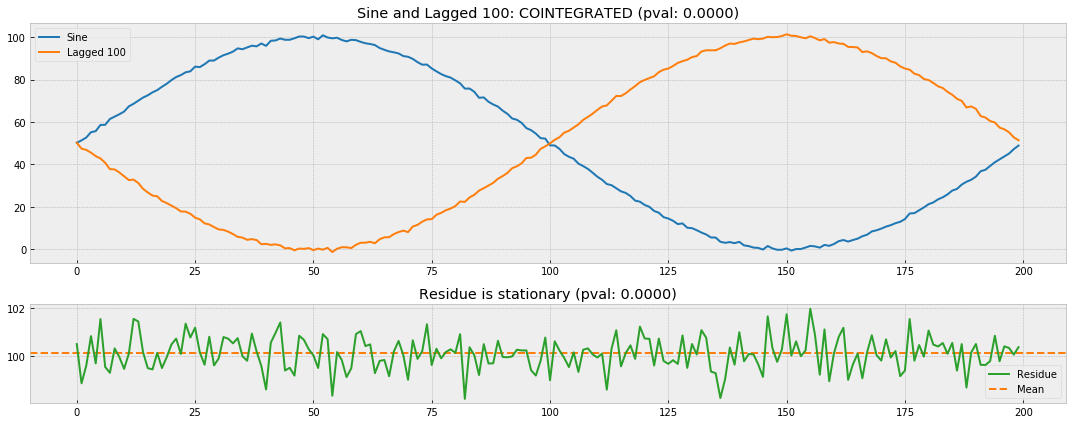

In [31]:
lag = 100
y1 = 50 + 50 * generateSine()
y2 = 50 + 50 * generateSine(startPeriod=-2*np.pi*lag/N)

plotCoint('Sine', y1, 'Lagged %d' % lag, y2)

# Two Random Walks

Two completely random walk time series.

In [3]:
def generateRandomWalk(n=N, seed=1):
    np.random.seed(seed)

    x = w = np.random.normal(scale=1, size=n)
    for t in range(n):
        x[t] = x[t-1] + w[t]
    return x

### Two Random Walks 1

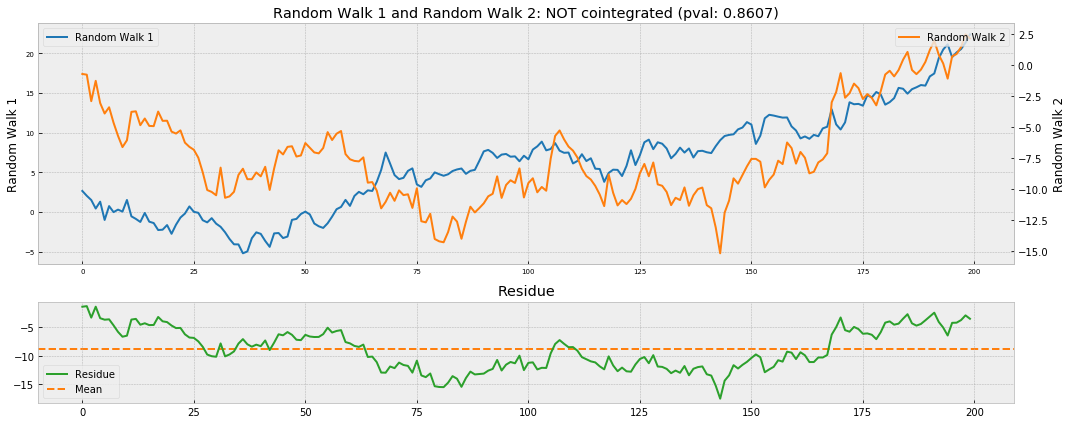

In [7]:
y1 = generateRandomWalk(seed=1)
y2 = generateRandomWalk(seed=2)

plotCoint('Random Walk 1', y1, 'Random Walk 2', y2)

### Two Random Walks 2

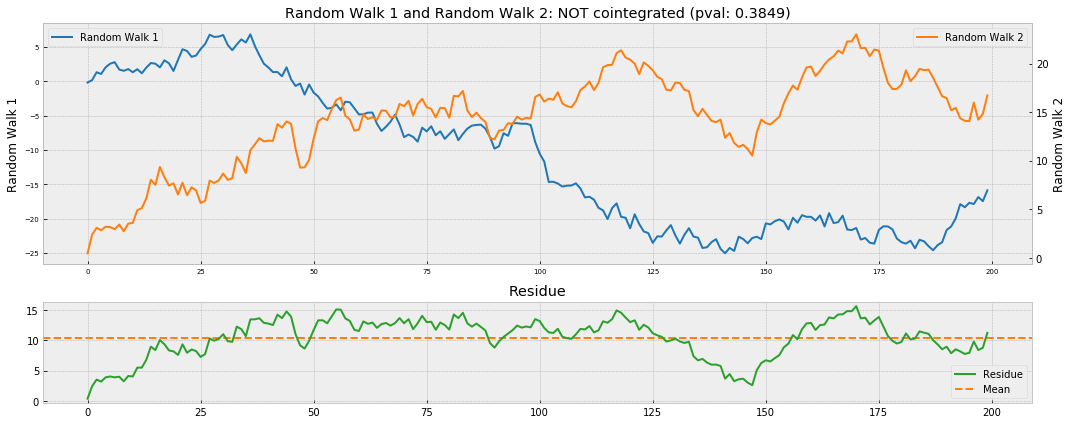

In [8]:
y1 = generateRandomWalk(seed=100)
y2 = generateRandomWalk(seed=200)

plotCoint('Random Walk 1', y1, 'Random Walk 2', y2)

# Lagged Random Walk

y2 is exactly y1, lagged by some time periods.


### Lag 10

In [153]:
maxlag = 500
y = generateRandomWalk(n=N+maxlag)

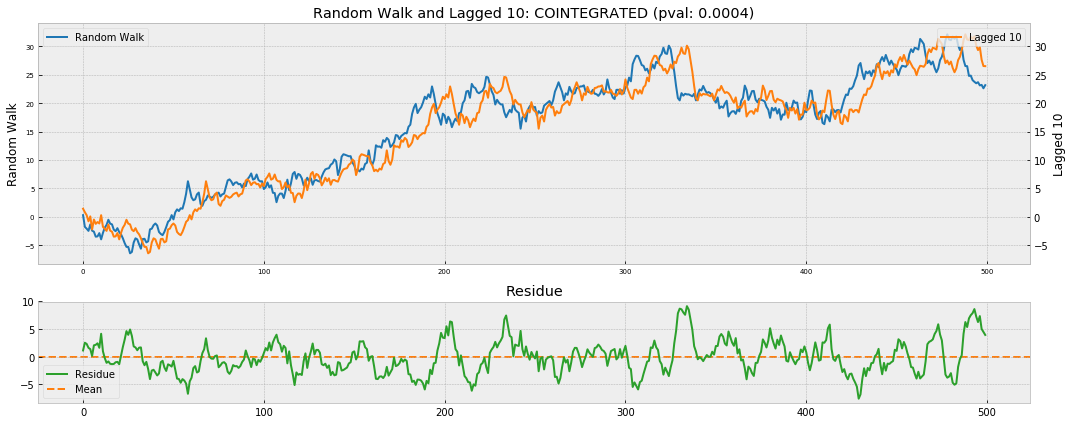

In [183]:
lag = 10
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 20

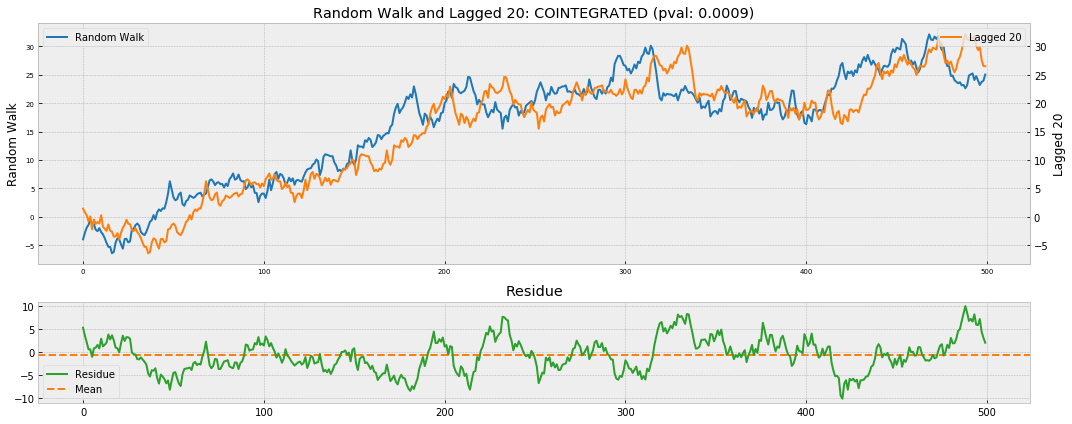

In [164]:
lag = 20
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 50

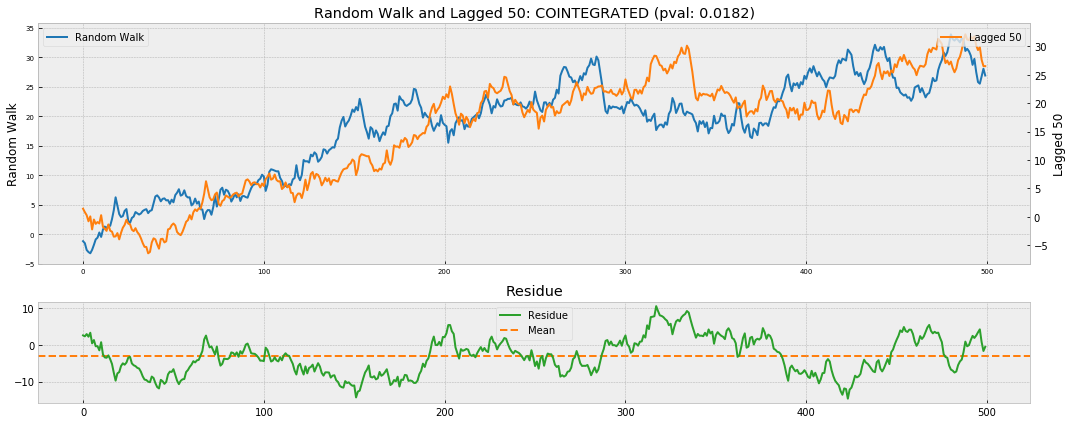

In [184]:
lag = 50
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

### Lag 100

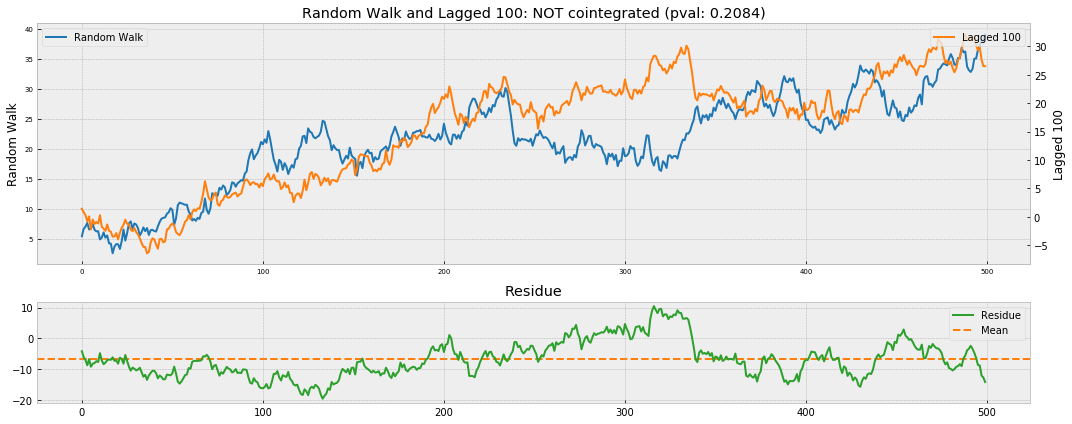

In [166]:
lag = 100
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('Random Walk', y1, 'Lagged %d' % lag, y2)

# Preceeding

The inverse of lagged.

### Preceeding 10

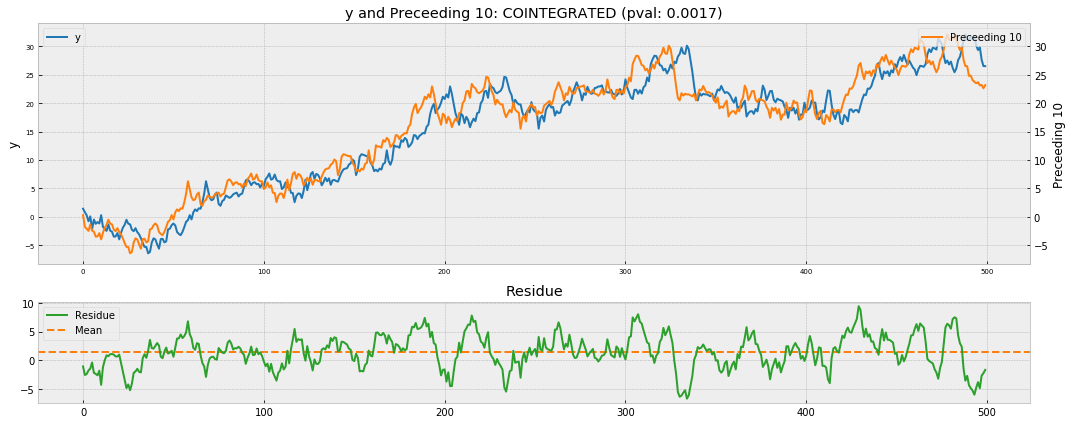

In [169]:
lag = 10
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

### Preceeding 20

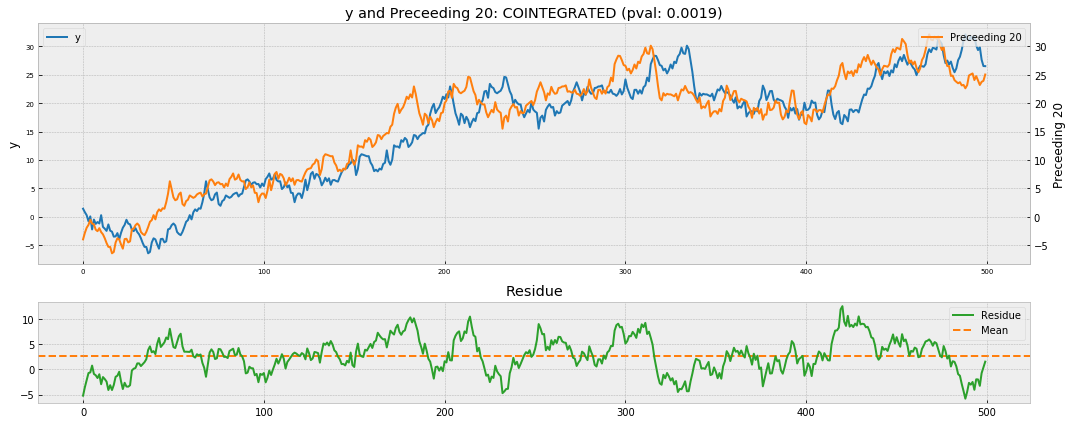

In [171]:
lag = 20
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

### Preceeding 50

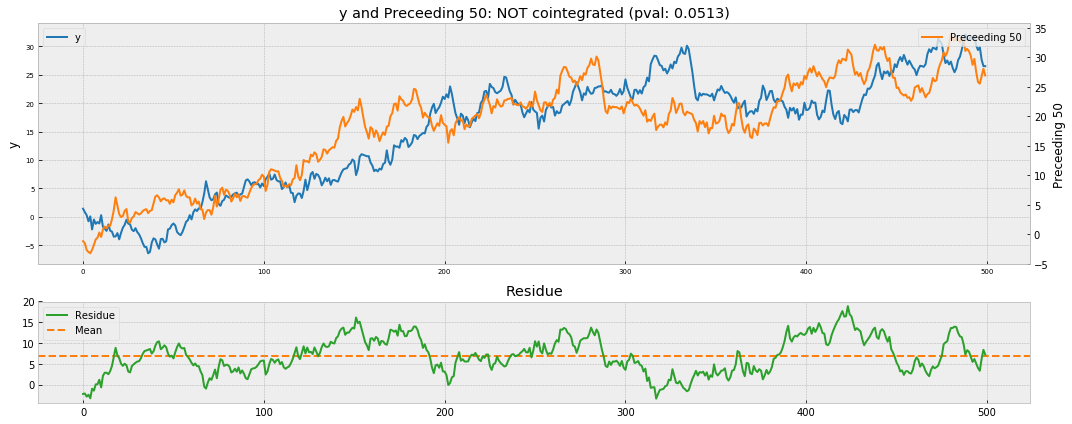

In [170]:
lag = 50
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

**NOTE**: lag 50 **was cointegrated**, which is different than this result.

### Preceeding 100

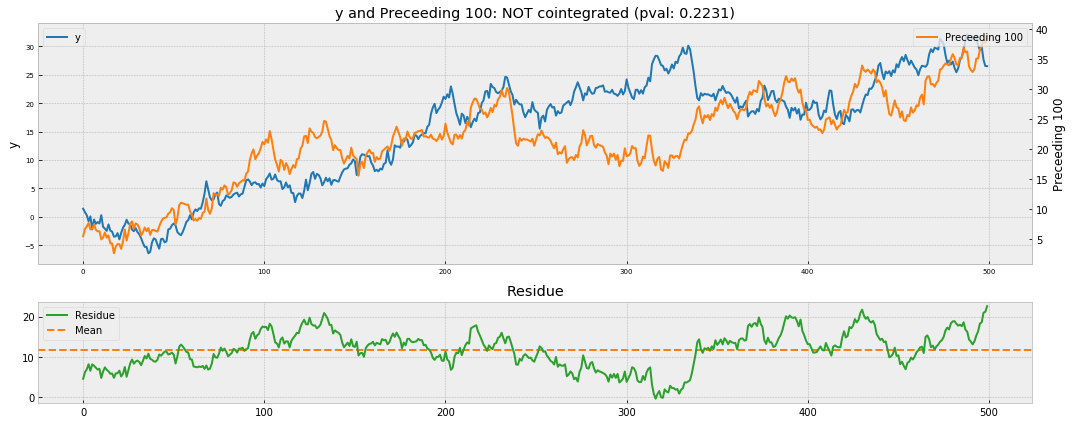

In [173]:
lag = 100
y1 = y[lag:lag+N]
y2 = y[:N]

plotCoint('y', y2, 'Preceeding %d' % lag, y1)

# Flipped <a name="flipped">

Inversed time series (plus a bit of white noise).

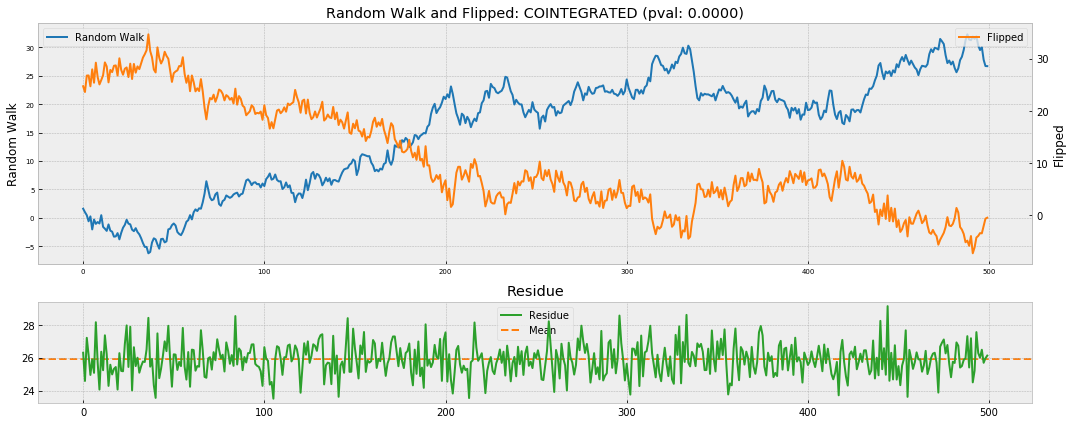

In [192]:
w = np.random.normal(size=N)
y1 = generateRandomWalk()
m = (y1.max() + y1.min()) / 2
y2 = 2 * m - y1 + w

plotCoint('Random Walk', y1, 'Flipped', y2)

# Linearly Amplified

y2 is amplified time series of y1 (notice y axis scales are different).

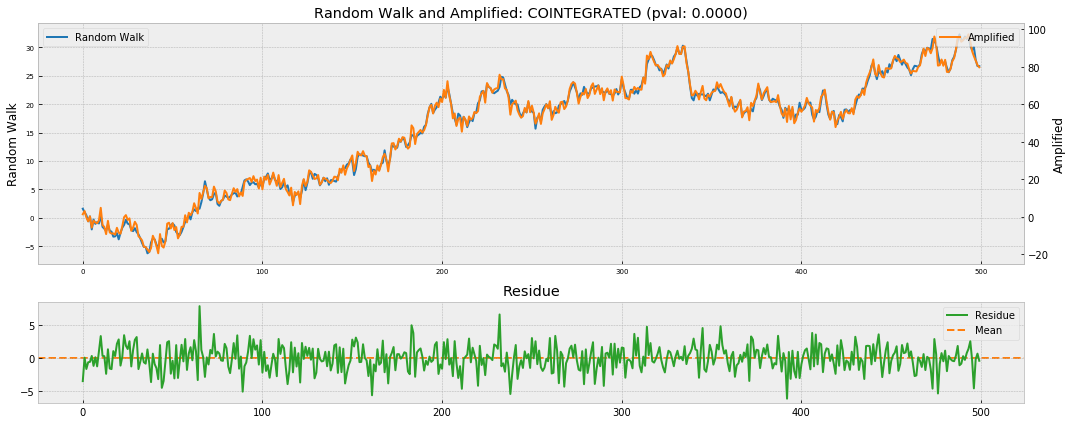

In [175]:
y1 = generateRandomWalk()

w2 = np.random.normal(size=N, scale=2)
y2 = y1 * 3 + w2

plotCoint('Random Walk', y1, 'Amplified', y2)